In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from time import time
from random import *
import pickle
from sklearn.model_selection import train_test_split
CAMINHO_PARA_SALVAR = 'C:/Users/felip/OneDrive/Documentos/tcc/HISTORICO_TCC2/RESULTADOS_PARAMETROS/ANALISE_CASOS/'

In [2]:
def valor_investido_para_eleito(DATA_FRAME_INI,SOMATORIO):
    resultado = [4]
    lista_result = [0]
    lista_gasto = [0]
    dic_result = {'GASTO':[],'RESULTADO':[]}
    while (resultado[0] != 1) | (resultado[0]!=1.0):
        total_gasto = DATA_FRAME_INI['TOTAL_GASTO']
        resultado = GRID_FL.predict(DATA_FRAME_INI)
        DATA_FRAME_INI['TOTAL_GASTO'] =  DATA_FRAME_INI['TOTAL_GASTO']+SOMATORIO
        print('PREVISÃO : ',resultado[0] , ' TOTAL GASTO : ',total_gasto)
        lista_result.append(resultado[0])
        lista_gasto.append(DATA_FRAME_INI['TOTAL_GASTO'].values[0])
        
    dic_result['GASTO'] = lista_gasto
    dic_result['RESULTADO']=lista_result
    
    return pd.DataFrame(dic_result)

def padrozinar_base_1(dados):
    scaler = StandardScaler()
    PADRAO = pd.DataFrame(scaler.fit_transform(pd.concat([dados,X_Train])[TITULOS_X]))
    PADRAO.columns = TITULOS_X
    return PADRAO[:1]

def padrozinar_base(dados):
    scaler = StandardScaler()
    PADRAO = pd.DataFrame(scaler.fit_transform(pd.concat([dados,X_Train])[TITULOS_X]))
    PADRAO.columns = TITULOS_X
    return PADRAO

def total_de_votos_valor_investido(DATA_FRAME_INI,SOMATORIO,OBJETIVO_QTD_VOTOS,MODELO,TIPO):
    total_votos_obtido = [0]
    lista_votos= [0]
    lista_gasto = [0]
    dic_result = {'GASTO':[],'TOTAL_VOTOS':[]}
    while total_votos_obtido[0] < OBJETIVO_QTD_VOTOS:
        total_gasto = DATA_FRAME_INI['TOTAL_GASTO']
        total_votos_obtido = MODELO.predict(DATA_FRAME_INI)
        DATA_FRAME_INI['TOTAL_GASTO'] =  DATA_FRAME_INI['TOTAL_GASTO']+SOMATORIO
        lista_votos.append(total_votos_obtido[0])
        lista_gasto.append(DATA_FRAME_INI['TOTAL_GASTO'].values[0])
        print('PREVISÃO : ',total_votos_obtido[0] , ' TOTAL GASTO : ',total_gasto)
        
    dic_result['GASTO'] = lista_gasto
    dic_result['TOTAL_VOTOS']=lista_votos
    
    return pd.DataFrame(dic_result)

def gerarGraficoEvolucaoVotos(BASE_PARAM,TITLE,X):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(TITLE,fontsize=10)
    plt.xlabel(X,fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel("TOTAL DE VOTOS",fontsize=10)
    line3, = ax.plot(list(BASE_PARAM.TOTAL_VOTOS), list(BASE_PARAM.GASTO), label='TOTAL DE GASTO')
    ax.legend(prop={'size':10})
    plt.show()


def ANALISE_DOS_TESTES_HIPERPARAMETRICOS(BASE_SAMPLES_LEAF,BASE_SAMPLES_SPLIT,BASE_MAX_DEPTH,BASE_N_ESTIMATORS):
    plt.figure(1)
    fig, ax = plt.subplots(figsize=(20,10))
    plt.suptitle('VALORES DAS MÉTRICAS PARA CADA HIPERPARÂMETRO')
    
    plt.subplot(221)
    plt.plot(list(BASE_SAMPLES_LEAF.VALOR), list(BASE_SAMPLES_LEAF.ACURACIA), label='ACURÁCIA (AC) FA')
    plt.plot(list(BASE_SAMPLES_LEAF.VALOR), list(BASE_SAMPLES_LEAF.F1_SCORE), label='MEDIDA-F (MF) FA')
    plt.title('HIPERPARÊMETRO SAMPLES LEAF - VALORES SEQUÊNCIAIS')
    plt.xlabel('VALORES APLICADOS',fontsize=10)
    plt.ylabel("VALORES DA ACURÁCIA / MEDIDA-F",fontsize=10)
    plt.grid(True)
    plt.legend()
    
    plt.subplot(222)
    plt.plot(list(BASE_SAMPLES_SPLIT.VALOR), list(BASE_SAMPLES_SPLIT.ACURACIA), label='ACURÁCIA (AC) FA')
    plt.plot(list(BASE_SAMPLES_SPLIT.VALOR), list(BASE_SAMPLES_SPLIT.F1_SCORE), label='MEDIDA-F (MF) FA')
    plt.title('HIPERPARÊMETRO SAMPLES SPLIT - VALORES SEQUÊNCIAIS')
    plt.xlabel('VALORES APLICADOS',fontsize=10)
    plt.ylabel("VALORES DA ACURÁCIA / MEDIDA-F",fontsize=10)
    plt.grid(True)
    plt.legend()

    plt.subplot(223)
    plt.plot(list(BASE_MAX_DEPTH.VALOR), list(BASE_MAX_DEPTH.ACURACIA), label='ACURÁCIA (AC) FA')
    plt.plot(list(BASE_MAX_DEPTH.VALOR), list(BASE_MAX_DEPTH.F1_SCORE), label='MEDIDA-F (MF) FA')
    plt.title('HIPERPARÊMETRO MAX DEPTH - VALORES SEQUÊNCIAIS')
    plt.xlabel('VALORES APLICADOS',fontsize=10)
    plt.ylabel("VALORES DA ACURÁCIA / MEDIDA-F",fontsize=10)
    plt.grid(True)
    plt.legend()

    plt.subplot(224)
    plt.plot(list(BASE_N_ESTIMATORS.VALOR), list(BASE_N_ESTIMATORS.ACURACIA), label='ACURÁCIA (AC) FA')
    plt.plot(list(BASE_N_ESTIMATORS.VALOR), list(BASE_N_ESTIMATORS.F1_SCORE), label='MEDIDA-F (MF) FA')
    plt.title('HIPERPARÊMETRO N ESTIMATORS - VALORES SEQUÊNCIAIS')
    plt.xlabel('VALORES APLICADOS',fontsize=10)
    plt.ylabel("VALORES DA ACURÁCIA / MEDIDA-F",fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.show()
    
def gerarGraficoVotos(BASE_PSDB,BASE_PT):
    fig, ax = plt.subplots(figsize=(12,6))
    plt.title('ANÁLISE TOTAL DE VOTOS POR TOTAL GASTO NA CIDADE DE FORTALEZA-CE',fontsize=12)
    plt.xlabel('VALOR INVESTIDO',fontsize=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("TOTAL DE VOTOS",fontsize=10)
    line3, = ax.plot(list(BASE_PSDB.GASTO), list(BASE_PSDB.TOTAL_VOTOS), label='PSB',color='blue')
    line4, = ax.plot(list(BASE_PT.GASTO), list(BASE_PT.TOTAL_VOTOS), label='PT',color='red')
    ax.legend(prop={'size':10})
    plt.show()
    
def gerarGraficoClassificacao(BASE_PMN,BASE_PSD):
    colunas = ['PMN','PSD']
    valores = [BASE_PMN.GASTO.values[len(BASE_PMN)-1],BASE_PSD.GASTO.values[len(BASE_PSD)-1]]
    print(valores)
    posicao = np.arange(len(colunas))
    fig, ax = plt.subplots(figsize=(20,8))
    plt.barh( posicao,valores , align='center', color='blue')
    plt.yticks( posicao, colunas,fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel('TOTAL DE GASTO',fontsize=12)
    plt.title('TOTAL DE INVESTIMENTO PARA SER ELEITO EM MULUNGU-CE',fontsize=15)

In [3]:
GRID_FL = pickle.load(open('C:/Users/felip/OneDrive/Documentos/tcc/HISTORICO_TCC2/RESULTADOS_PARAMETROS/MODELOS/GRID_FL_PROBL_1_SEM_VOTOS_3.sav', 'rb'))
GRID_FL_P2 = pickle.load(open('C:/Users/felip/OneDrive/Documentos/tcc/HISTORICO_TCC2/RESULTADOS_PARAMETROS/MODELOS/GRID_FL_PROBL_2_SEM_VOTOS_3.sav', 'rb'))
GRID_RL_P2 = pickle.load(open('C:/Users/felip/OneDrive/Documentos/tcc/HISTORICO_TCC2/RESULTADOS_PARAMETROS/MODELOS/GRID_RL_PROBL_2_SEM_VOTOS_3.sav', 'rb'))

In [9]:
dic_mulungu_PMN = {'ANO_ELEICAO':[2016],'CODIGO_ESTADO':[6],'CODIGO_MUNICIPIO':[14834],'NUMERO_PARTIDO':[33],'ANALFABETO':[543],'ENSINO_FUNDAMENTAL_COMPLETO':[375]
      ,'ENSINO_FUNDAMENTAL_INCOMPLETO':[2088], 'ENSINO_MEDIO_COMPLETO':[1876],'ENSINO_MEDIO_INCOMPLETO':[1015],'LE_E_ESCREVE':[1234],'SUPERIOR_COMPLETO':[387],'SUPERIOR_INCOMPLETO':[315],
      'TOTAL_GASTO':[10000],'SEXO':[2],'COD_GRAU_INSTRUCAO':[8]}

dic_mulungu_PSD = {'ANO_ELEICAO':[2016],'CODIGO_ESTADO':[6],'CODIGO_MUNICIPIO':[14834],'NUMERO_PARTIDO':[55],'ANALFABETO':[543],'ENSINO_FUNDAMENTAL_COMPLETO':[375]
      ,'ENSINO_FUNDAMENTAL_INCOMPLETO':[2088], 'ENSINO_MEDIO_COMPLETO':[1876],'ENSINO_MEDIO_INCOMPLETO':[1015],'LE_E_ESCREVE':[1234],'SUPERIOR_COMPLETO':[387],'SUPERIOR_INCOMPLETO':[315],
      'TOTAL_GASTO':[10000],'SEXO':[2],'COD_GRAU_INSTRUCAO':[8]}

dic_fortaleza_PT = {'ANO_ELEICAO':[2016],'CODIGO_ESTADO':[6],'CODIGO_MUNICIPIO':[13897],'NUMERO_PARTIDO':[13],'ANALFABETO':[42995],'ENSINO_FUNDAMENTAL_COMPLETO':[122151]
      ,'ENSINO_FUNDAMENTAL_INCOMPLETO':[393753], 'ENSINO_MEDIO_COMPLETO':[444996],'ENSINO_MEDIO_INCOMPLETO':[353511],'LE_E_ESCREVE':[133279],'SUPERIOR_COMPLETO':[181385],'SUPERIOR_INCOMPLETO':[103073],
      'TOTAL_GASTO':[100000],'SEXO':[2],'COD_GRAU_INSTRUCAO':[8],'QTD_APTOS':[1776699]}

dic_fortaleza_PSB = {'ANO_ELEICAO':[2016],'CODIGO_ESTADO':[6],'CODIGO_MUNICIPIO':[13897],'NUMERO_PARTIDO':[40],'ANALFABETO':[42995],'ENSINO_FUNDAMENTAL_COMPLETO':[122151]
      ,'ENSINO_FUNDAMENTAL_INCOMPLETO':[393753], 'ENSINO_MEDIO_COMPLETO':[444996],'ENSINO_MEDIO_INCOMPLETO':[353511],'LE_E_ESCREVE':[133279],'SUPERIOR_COMPLETO':[181385],'SUPERIOR_INCOMPLETO':[103073],
      'TOTAL_GASTO':[100000],'SEXO':[2],'COD_GRAU_INSTRUCAO':[8],'QTD_APTOS':[1776699]}


In [10]:
DF_TESTE_FORTALEZA_PT = total_de_votos_valor_investido(pd.DataFrame(dic_fortaleza_PT),50000,480000,GRID_FL_P2,'FA')
DF_TESTE_FORTALEZA_PT.to_csv(CAMINHO_PARA_SALVAR+"DF_TESTE_FORTALEZA_PT.txt",sep=";",encoding="ANSI",index_label=False)

PREVISÃO :  176402.16589446584  TOTAL GASTO :  0    150000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    200000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    250000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    300000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    350000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    400000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    450000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    500000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    550000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    600000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.465091565  TOTAL GASTO :  0    650000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  183563.

In [11]:
DF_TESTE_FORTALEZA_PSB = total_de_votos_valor_investido(pd.DataFrame(dic_fortaleza_PSB),50000,480000,GRID_FL_P2,'FA')
DF_TESTE_FORTALEZA_PSB.to_csv(CAMINHO_PARA_SALVAR+"DF_TESTE_FORTALEZA_PSB.txt",sep=";",encoding="ANSI",index_label=False)

PREVISÃO :  187535.59591519285  TOTAL GASTO :  0    150000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  207258.71942388397  TOTAL GASTO :  0    200000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  207258.71942388397  TOTAL GASTO :  0    250000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  207258.71942388397  TOTAL GASTO :  0    300000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  209313.65358026253  TOTAL GASTO :  0    350000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  209313.65358026253  TOTAL GASTO :  0    400000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  209313.65358026253  TOTAL GASTO :  0    450000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  209313.65358026253  TOTAL GASTO :  0    500000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  209313.65358026253  TOTAL GASTO :  0    550000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  213112.9285522042  TOTAL GASTO :  0    600000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  213112.9285522042  TOTAL GASTO :  0    650000
Name: TOTAL_GASTO, dtype: int64
P

In [6]:
DF_TESTE_FORTALEZA_PSB = total_de_votos_valor_investido(pd.DataFrame(dic_fortaleza_PSB),50000,480000,GRID_FL_P2,'FA')
DF_TESTE_FORTALEZA_PSB.to_csv(CAMINHO_PARA_SALVAR+"DF_TESTE_FORTALEZA_PSB.txt",sep=";",encoding="ANSI",index_label=False)

PREVISÃO :  172434.1165117498  TOTAL GASTO :  0    150000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    200000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    250000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    300000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    350000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    400000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    450000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    500000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    550000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    600000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  179595.41570884897  TOTAL GASTO :  0    650000
Name: TOTAL_GASTO, dtype: int64


In [7]:
DF_TESTE_CLASS_MULUNGU_PMN = valor_investido_para_eleito(pd.DataFrame(dic_mulungu_PMN),10000)
DF_TESTE_CLASS_MULUNGU_PMN.to_csv(CAMINHO_PARA_SALVAR+"DF_TESTE_CLASS_MULUNGU_PMN.txt",sep=";",encoding="ANSI",index_label=False)

PREVISÃO :  4.0  TOTAL GASTO :  0    20000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  4.0  TOTAL GASTO :  0    30000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  4.0  TOTAL GASTO :  0    40000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  4.0  TOTAL GASTO :  0    50000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  4.0  TOTAL GASTO :  0    60000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  4.0  TOTAL GASTO :  0    70000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  1.0  TOTAL GASTO :  0    80000
Name: TOTAL_GASTO, dtype: int64


In [8]:
DF_TESTE_CLASS_MULUNGU_PSD = valor_investido_para_eleito(pd.DataFrame(dic_mulungu_PSD),10000)
DF_TESTE_CLASS_MULUNGU_PSD.to_csv(CAMINHO_PARA_SALVAR+"DF_TESTE_CLASS_MULUNGU_PSD.txt",sep=";",encoding="ANSI",index_label=False)

PREVISÃO :  4.0  TOTAL GASTO :  0    20000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  4.0  TOTAL GASTO :  0    30000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  4.0  TOTAL GASTO :  0    40000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  4.0  TOTAL GASTO :  0    50000
Name: TOTAL_GASTO, dtype: int64
PREVISÃO :  1.0  TOTAL GASTO :  0    60000
Name: TOTAL_GASTO, dtype: int64


In [9]:
BANCO_DE_INFORMACOES_TCC = pd.read_csv("C:/Users/felip/TCC_CIENCIA_DE_DADOS/BASES_DADOS_TSE_UNITARIA/BASE_MACHINE_LEARNING_CAND/BASES_FINALIZADAS/BANCO_DE_INFORMACOES_TCC.txt",sep=';',encoding='ANSI')


In [10]:
BANCO_DE_INFORMACOES_TCC.loc[:,['NUMERO_PARTIDO','SIGLA_PARTIDO']].sort_values('NUMERO_PARTIDO').drop_duplicates()

,NUMERO_PARTIDO,SIGLA_PARTIDO
11792,10,PRB
927,11,PP
5879,12,PDT
399,13,PT
1654,14,PTB
39748,15,PMDB
72199,16,PSTU
24149,17,PSL
23083,18,REDE
13504,19,PTN


# GRAFICOS PARA ANALISE

In [47]:
DF_TESTE_CLASS_MULUNGU_PSD

,GASTO,RESULTADO
0,0,0.0
1,20000,4.0
2,30000,4.0
3,40000,4.0
4,50000,4.0
5,60000,1.0


In [48]:
DF_TESTE_CLASS_MULUNGU_PMN

,GASTO,RESULTADO
0,0,0.0
1,20000,4.0
2,30000,4.0
3,40000,4.0
4,50000,4.0
5,60000,4.0
6,70000,4.0
7,80000,1.0


[80000, 60000]


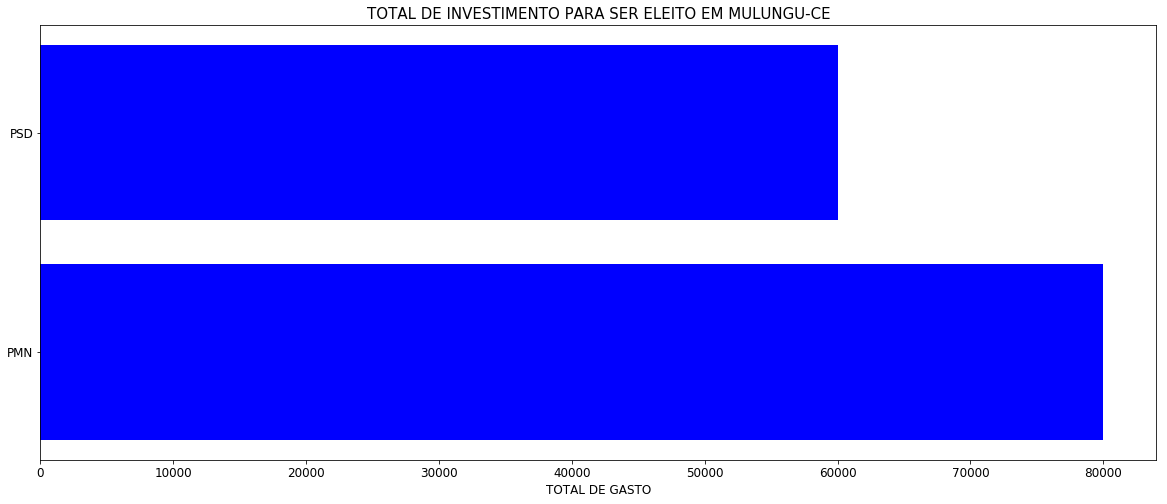

In [91]:
gerarGraficoClassificacao(DF_TESTE_CLASS_MULUNGU_PMN,DF_TESTE_CLASS_MULUNGU_PSD)

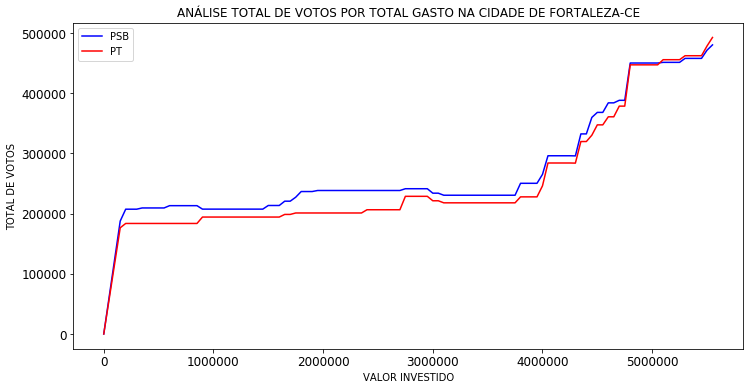

In [13]:
gerarGraficoVotos(DF_TESTE_FORTALEZA_PSB,DF_TESTE_FORTALEZA_PT)

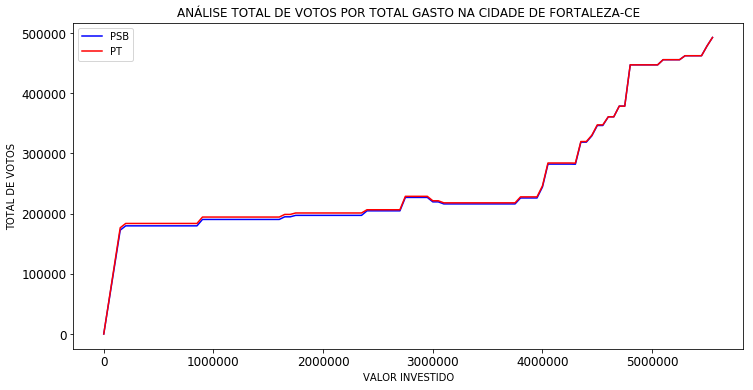

In [8]:
gerarGraficoVotos(DF_TESTE_FORTALEZA_PSB,DF_TESTE_FORTALEZA_PT)

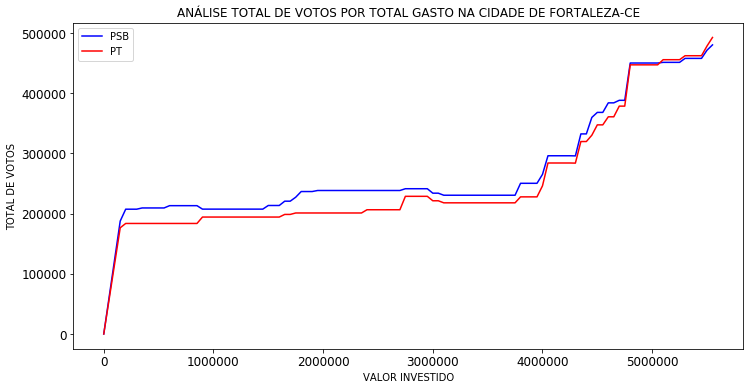

In [12]:
gerarGraficoVotos(DF_TESTE_FORTALEZA_PSB,DF_TESTE_FORTALEZA_PT)